Rainfall Weather Forecasting

Rainfall Weather Forecasting

Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

Dataset Link-  https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Rainfall%20Forecast/Rainfall.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score,roc_auc_score, roc_curve, auc

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings ("ignore")

In [2]:
#Load dataset
link="https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Rainfall%20Forecast/Rainfall.csv"

rain_df=pd.read_csv(link)

In [3]:
rain_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Observation:

This dataset contain about 10 years of daily weather observations of different locations in Australia. the datas are numerical and categorical datas. There are 8425 samples in the dataset with 23 columns of which 2 of are target variable ('Income').

In [4]:
#Columns present in the dataset 
rain_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
#shape of the Data
rain_df.shape

(8425, 23)

Data Preprocessing

In [6]:
# Checking the column information
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Observation:

The columns have 2 different data types made up of 7 object dtypes and 16 floats Dtypes.

Most of the columns have missing information.

In [7]:
total = rain_df.isnull().sum().sort_values(ascending=False)
percent_1 = rain_df.isnull().sum()/rain_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Sunshine,3994,47.4
Evaporation,3512,41.7
Cloud3pm,2455,29.1
Cloud9am,2421,28.7
Pressure3pm,1312,15.6
Pressure9am,1309,15.5
WindGustDir,991,11.8
WindGustSpeed,991,11.8
WindDir9am,829,9.8
WindDir3pm,308,3.7


Columns with above 20% of missings values will be dropped and other non-contributory features like date and Location.The features with less than 20% missing values can easily be treated by droping the rows with NAN.

In [8]:
# Drop columns that are not relevant for the analysis
rain_df.drop(columns=['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'], inplace=True)


In [9]:
rain_df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [10]:
# Handle missing values (drop nan)
rain_df.dropna(inplace=True)

In [11]:
rain_df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
8420,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


In [12]:
#Unique values in each of the colums

rain_df.nunique().to_frame("Unique Values")

,Unique Values
Date,2615
Location,10
MinTemp,276
MaxTemp,328
Rainfall,222
WindGustDir,16
WindGustSpeed,49
WindDir9am,16
WindDir3pm,16
WindSpeed9am,32


In [13]:
# Extract the Day and Month from Date column.
rain_df['Date'] = rain_df['Date'].str.split('-').str[0]

Text(0.5, 1.0, 'Average Rainfall According to Location')

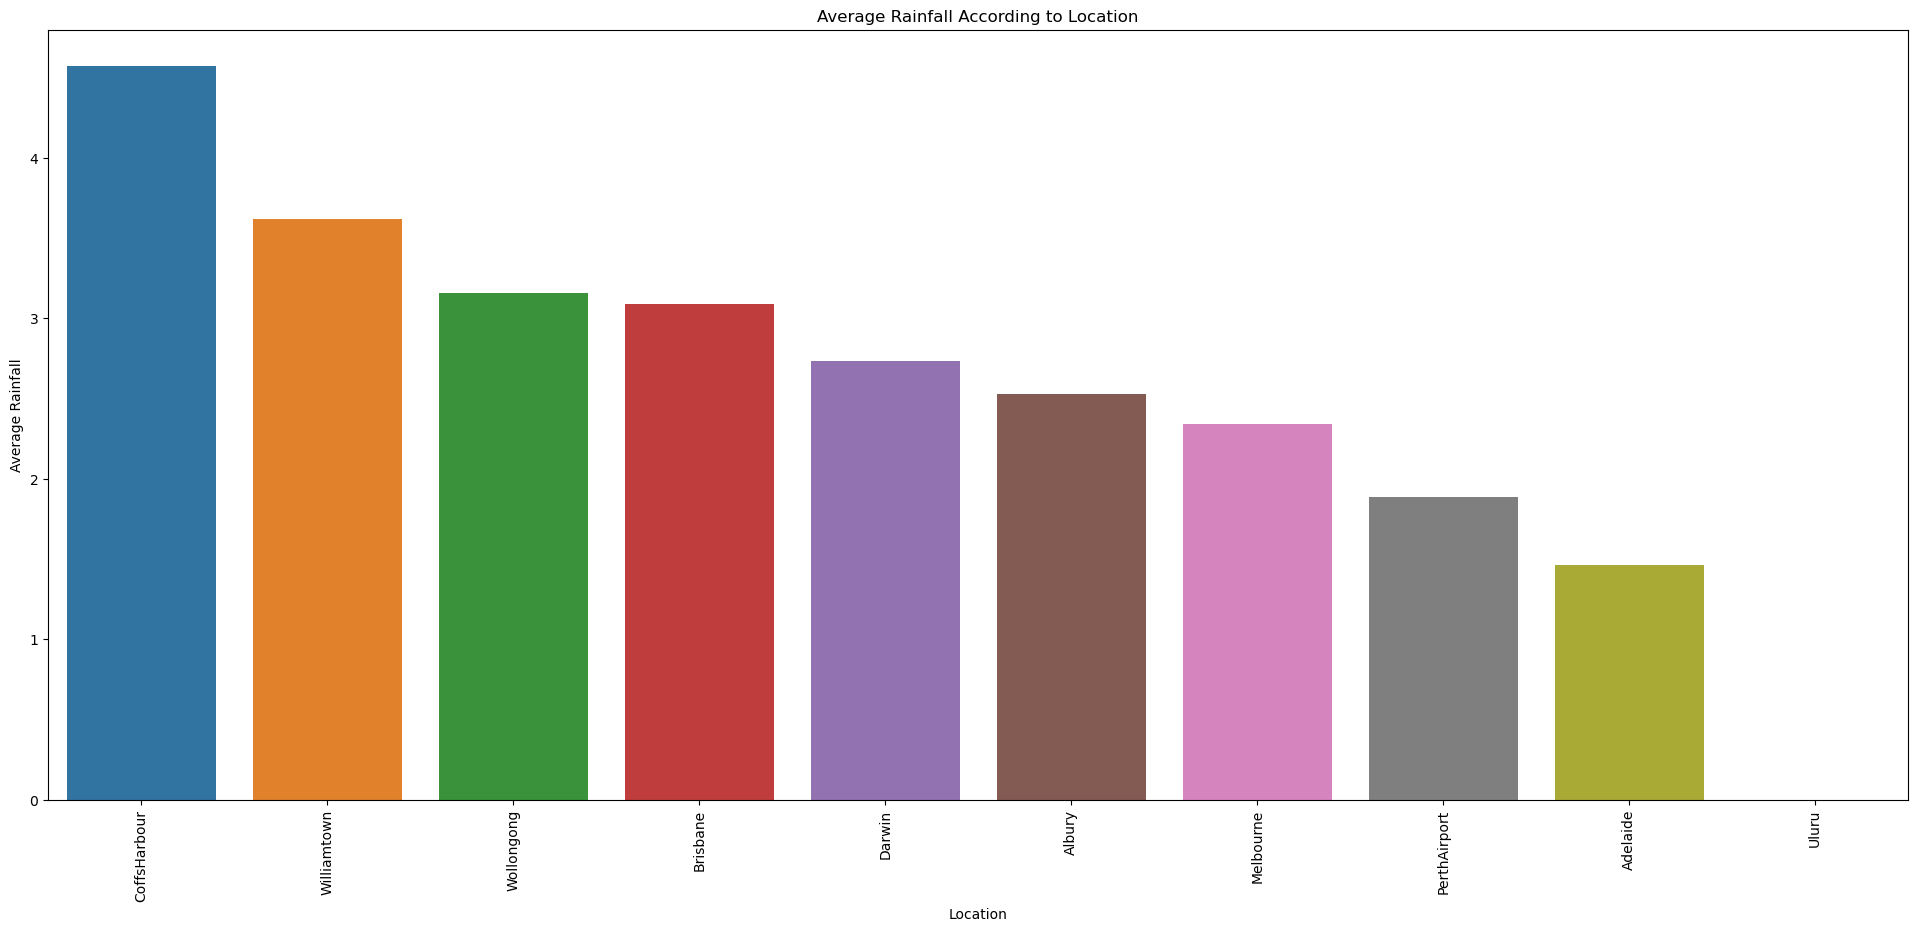

In [14]:
##Plot average Rainfall against Location
Location_list=list(rain_df.Location.unique())
average_Rainfall=[]

for i in Location_list:
    x=rain_df[rain_df.Location==i]
    Location_average=sum(x.Rainfall)/len(x)
    average_Rainfall.append(Location_average)

df1=pd.DataFrame({'Location_list':Location_list,'average_Rainfall':average_Rainfall})
new_index=df1.average_Rainfall.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.Location_list,y=sorted_data.average_Rainfall)

plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Average Rainfall')
plt.title('Average Rainfall According to Location')

The above Figure shows the Locations Average Rainfall with CoffsHarbour experincing the highest average rain and Uluru with the loweest Rainfall

Text(0.5, 1.0, 'Average Rainfall According to Year')

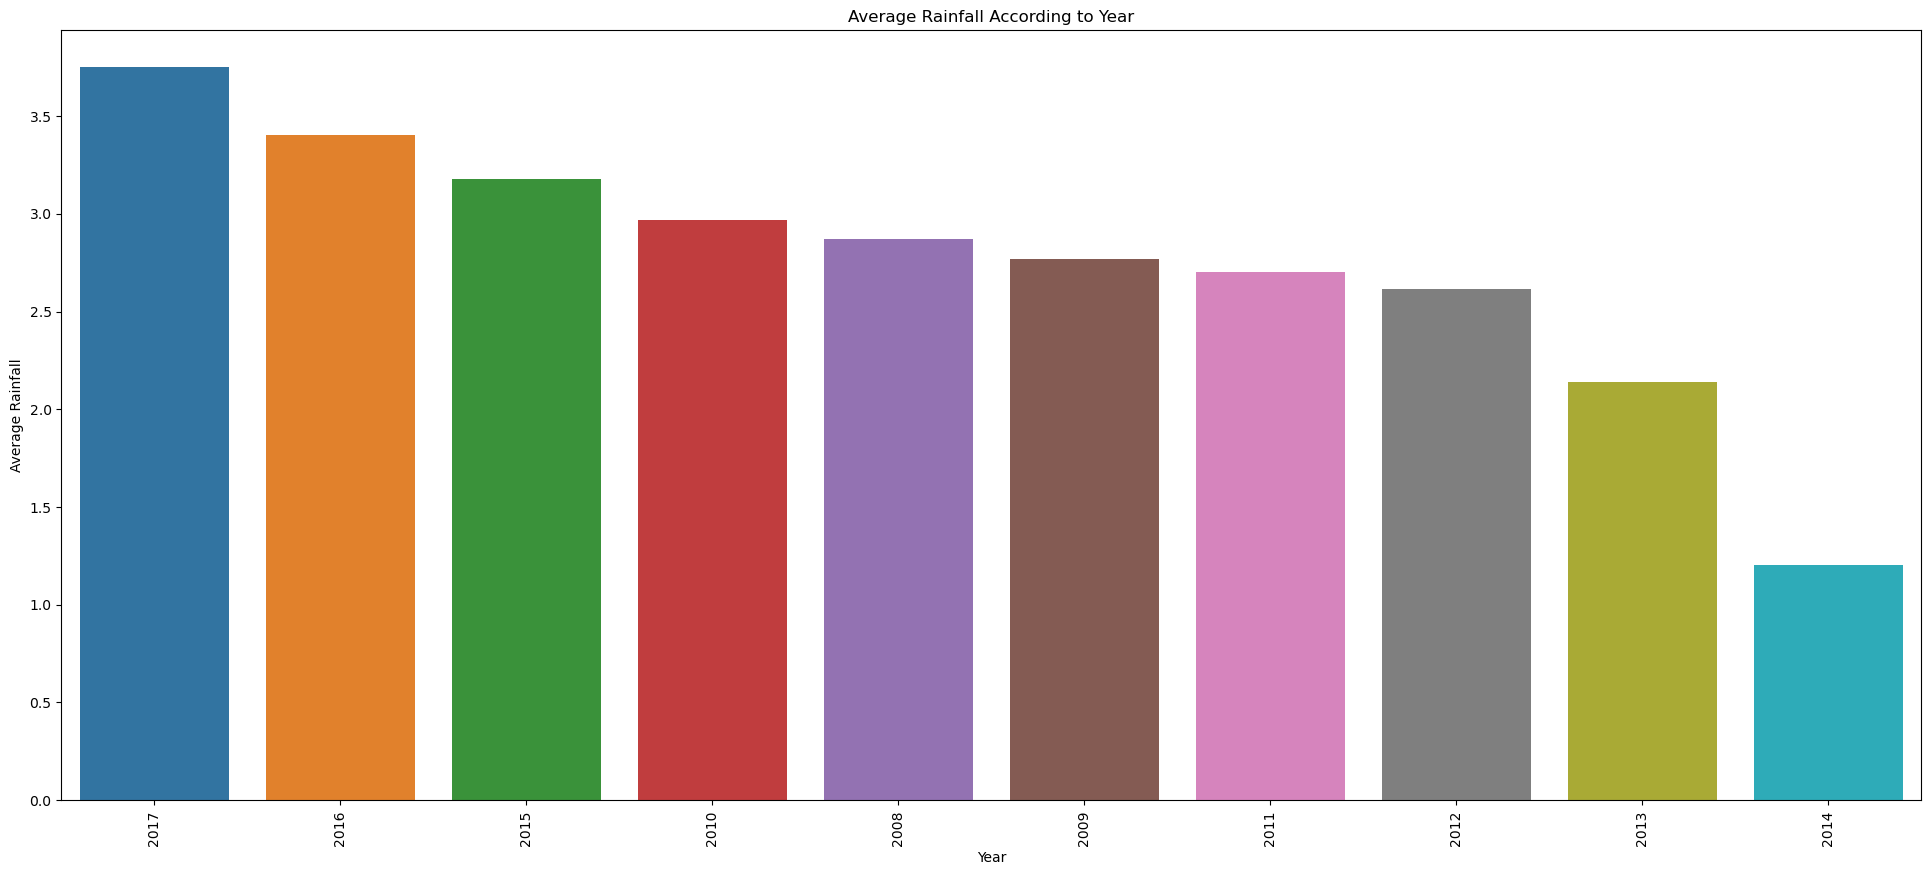

In [15]:
##Plot average Rainfall against Yearly Date
Date_list=list(rain_df.Date.unique())
average_Rainfall=[]

for i in Date_list:
    x=rain_df[rain_df.Date==i]
    Date_average=sum(x.Rainfall)/len(x)
    average_Rainfall.append(Date_average)

df1=pd.DataFrame({'Date_list':Date_list,'average_Rainfall':average_Rainfall})
new_index=df1.average_Rainfall.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.Date_list,y=sorted_data.average_Rainfall)

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Average Rainfall')
plt.title('Average Rainfall According to Year')

The above Figure shows the Yearly Average Rainfall with 2017 showing the highest average rain poured and 2014 with the loweest Rainfail.

In [16]:
rain_df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000
mean,13.536592,24.057770,2.784397,41.287903,15.897979,20.000316,66.111655,50.965414,1017.541693,1015.146920,18.174179,22.605212
std,5.305000,6.221539,9.539455,14.291072,9.464313,8.934660,16.727300,18.616937,6.783294,6.710036,5.575869,6.052499
min,-1.300000,8.200000,0.000000,11.000000,2.000000,2.000000,10.000000,6.000000,989.800000,982.900000,1.900000,7.300000
25%,9.600000,19.500000,0.000000,31.000000,9.000000,13.000000,55.000000,38.000000,1013.000000,1010.400000,14.100000,18.300000
50%,13.600000,23.500000,0.000000,39.000000,13.000000,19.000000,66.000000,51.000000,1017.500000,1015.300000,18.100000,22.100000
75%,17.600000,28.200000,1.000000,50.000000,20.000000,26.000000,78.000000,63.000000,1022.100000,1019.700000,22.300000,26.600000
max,28.500000,45.500000,225.000000,107.000000,61.000000,61.000000,100.000000,99.000000,1039.000000,1036.000000,39.400000,43.900000


In [17]:
# Convert categorical columns to numerical using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['Location','WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
for col in categorical_columns:
    rain_df[col] = label_encoder.fit_transform(rain_df[col])

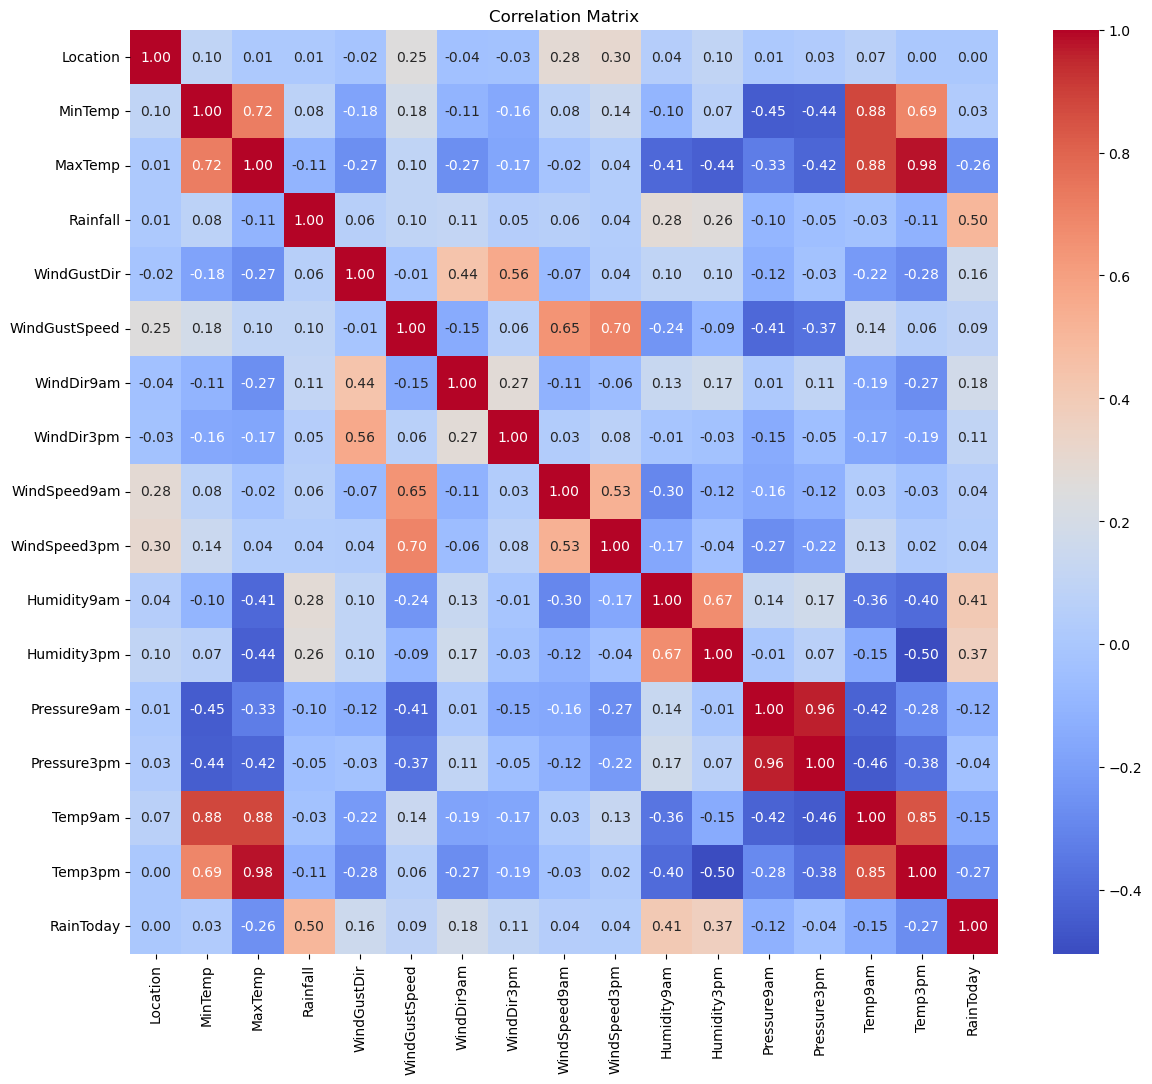

In [18]:
# Plot correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(rain_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

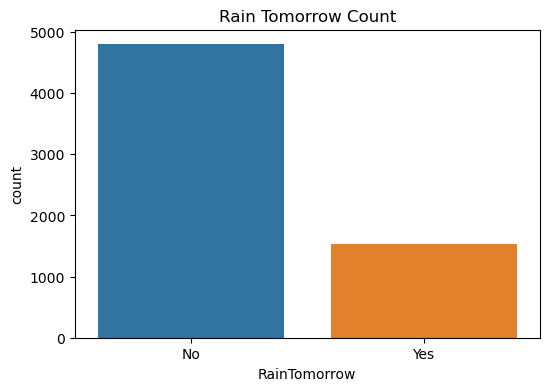

In [19]:
# Count plot for RainTomorrow
plt.figure(figsize=(6, 4))
sns.countplot(x='RainTomorrow', data=rain_df)
plt.title('Rain Tomorrow Count')
plt.show()

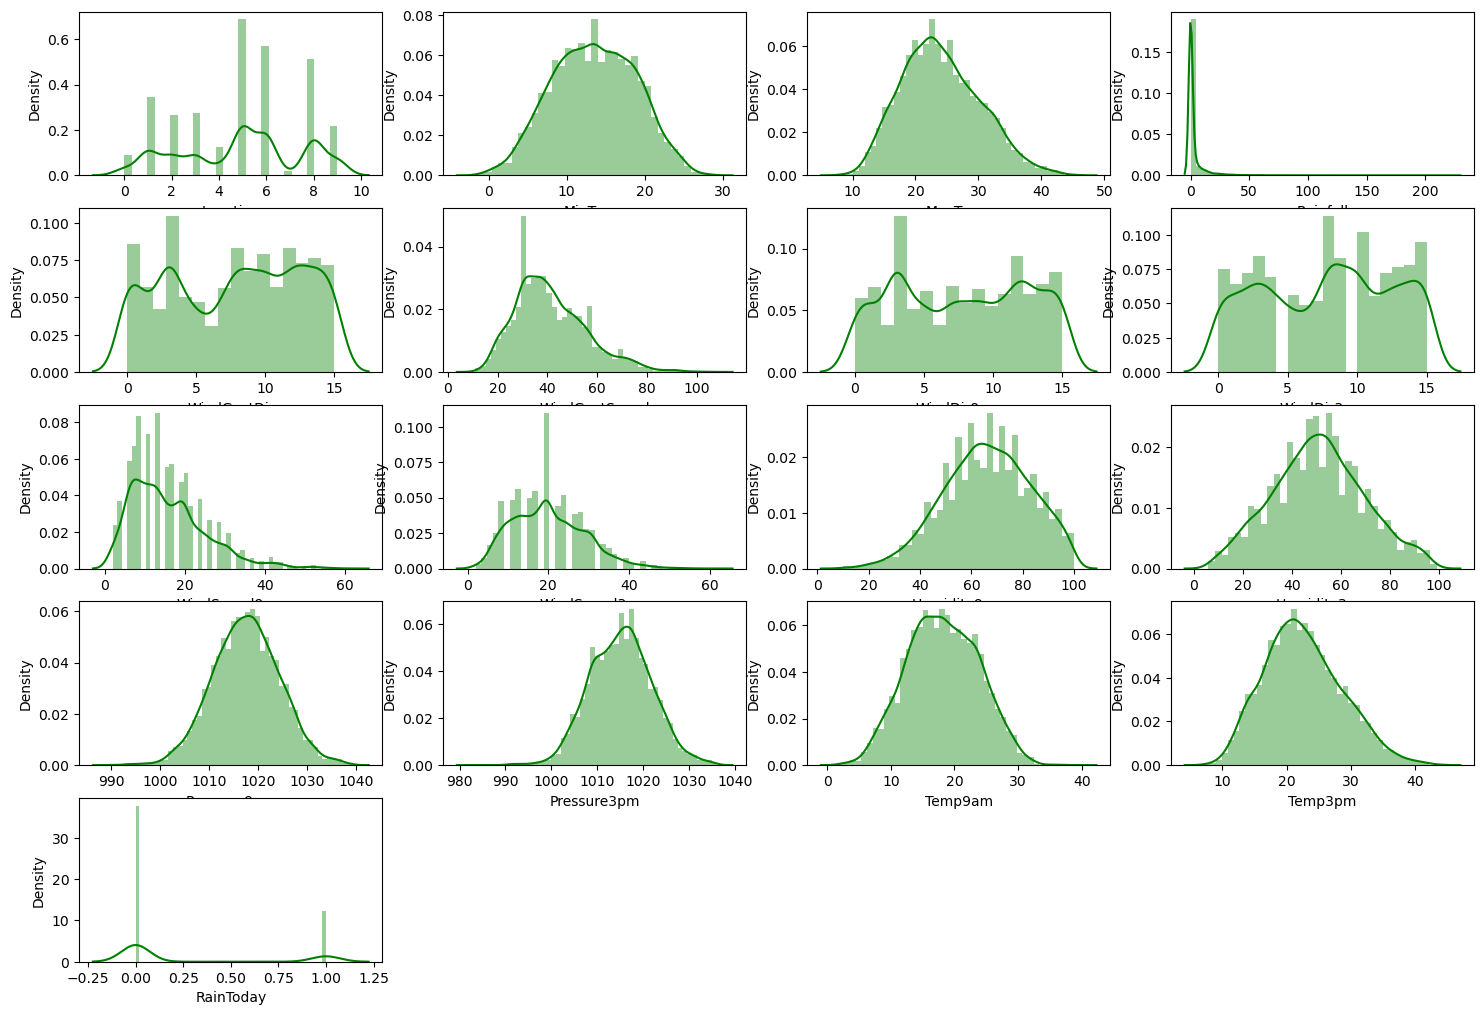

In [20]:
#checking skewing of the dataset distribution 
plt.figure(figsize=(18,20))
for i in enumerate(rain_df.select_dtypes(exclude=['object']).columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(rain_df[i[1]],color='g')

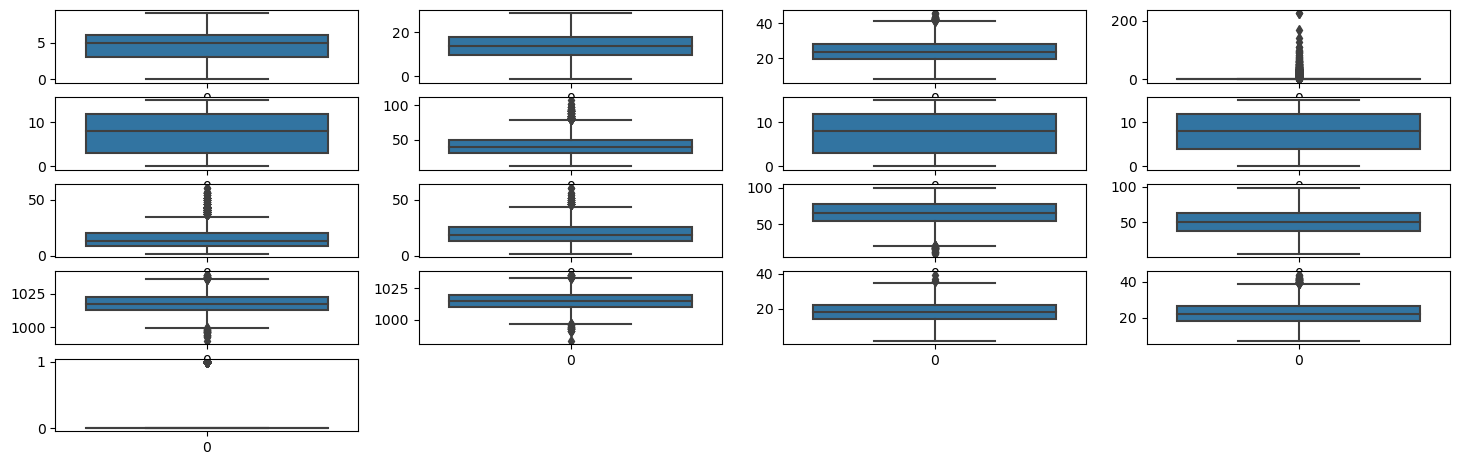

In [21]:
# Draw boxplot for each column to check Outliers              
plt.figure(figsize=(18,10))
for i in enumerate(rain_df.select_dtypes(exclude=['object']).columns):
    plt.subplot(9,4,i[0]+1)
    sns.boxplot(rain_df[i[1]])                  

In [22]:
#Removing Outlier
from scipy.stats import zscore

z=np.abs(zscore(rain_df[['MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday']]))
print(np.where(z>3))

(array([  12,   12,   41,   41,   49,   49,   57,   57,   58,   59,   59,
         62,   63,   63,  104,  200,  305,  305,  327,  328,  329,  351,
        368,  431,  522,  522,  523,  536,  550,  585,  605,  628,  629,
        634,  726,  739,  768,  769,  769,  769,  790,  791,  793,  913,
        957,  958,  992,  996, 1019, 1020, 1110, 1111, 1164, 1165, 1166,
       1225, 1226, 1227, 1258, 1279, 1288, 1319, 1326, 1328, 1335, 1423,
       1468, 1476, 1476, 1483, 1484, 1484, 1484, 1485, 1487, 1499, 1499,
       1499, 1506, 1506, 1516, 1516, 1636, 1647, 1658, 1658, 1702, 1713,
       1767, 1769, 1778, 1794, 1794, 1794, 1794, 1795, 1795, 1803, 1816,
       1836, 1858, 1899, 1911, 1942, 1943, 1947, 1954, 1958, 2024, 2033,
       2064, 2071, 2073, 2080, 2168, 2213, 2221, 2221, 2228, 2229, 2229,
       2229, 2230, 2232, 2244, 2244, 2244, 2251, 2251, 2261, 2261, 2381,
       2392, 2403, 2403, 2447, 2458, 2512, 2514, 2523, 2539, 2539, 2539,
       2539, 2540, 2540, 2548, 2561, 2581, 2603, 2

In [23]:
# Checking the shape of the dataset after outliers have been remove and reassigning the changed dataframe name to our original dataframe name
z = np.abs(zscore(rain_df[['MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday']]))
threshold = 3
df1 = rain_df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", rain_df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (rain_df.shape[0]-df1.shape[0])/rain_df.shape[0]*100)

rain_df=df1.copy() 

Shape of the dataframe before removing outliers:  (6332, 19)
Shape of the dataframe after removing outliers:  (6069, 19)
Percentage of data loss post outlier removal:  4.153506001263424


In [24]:
rain_df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,No
1,2008,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,No
2,2008,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,No
3,2008,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,No
4,2008,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2017,7,3.5,21.8,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,No
8420,2017,7,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,No
8421,2017,7,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,No
8422,2017,7,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,No


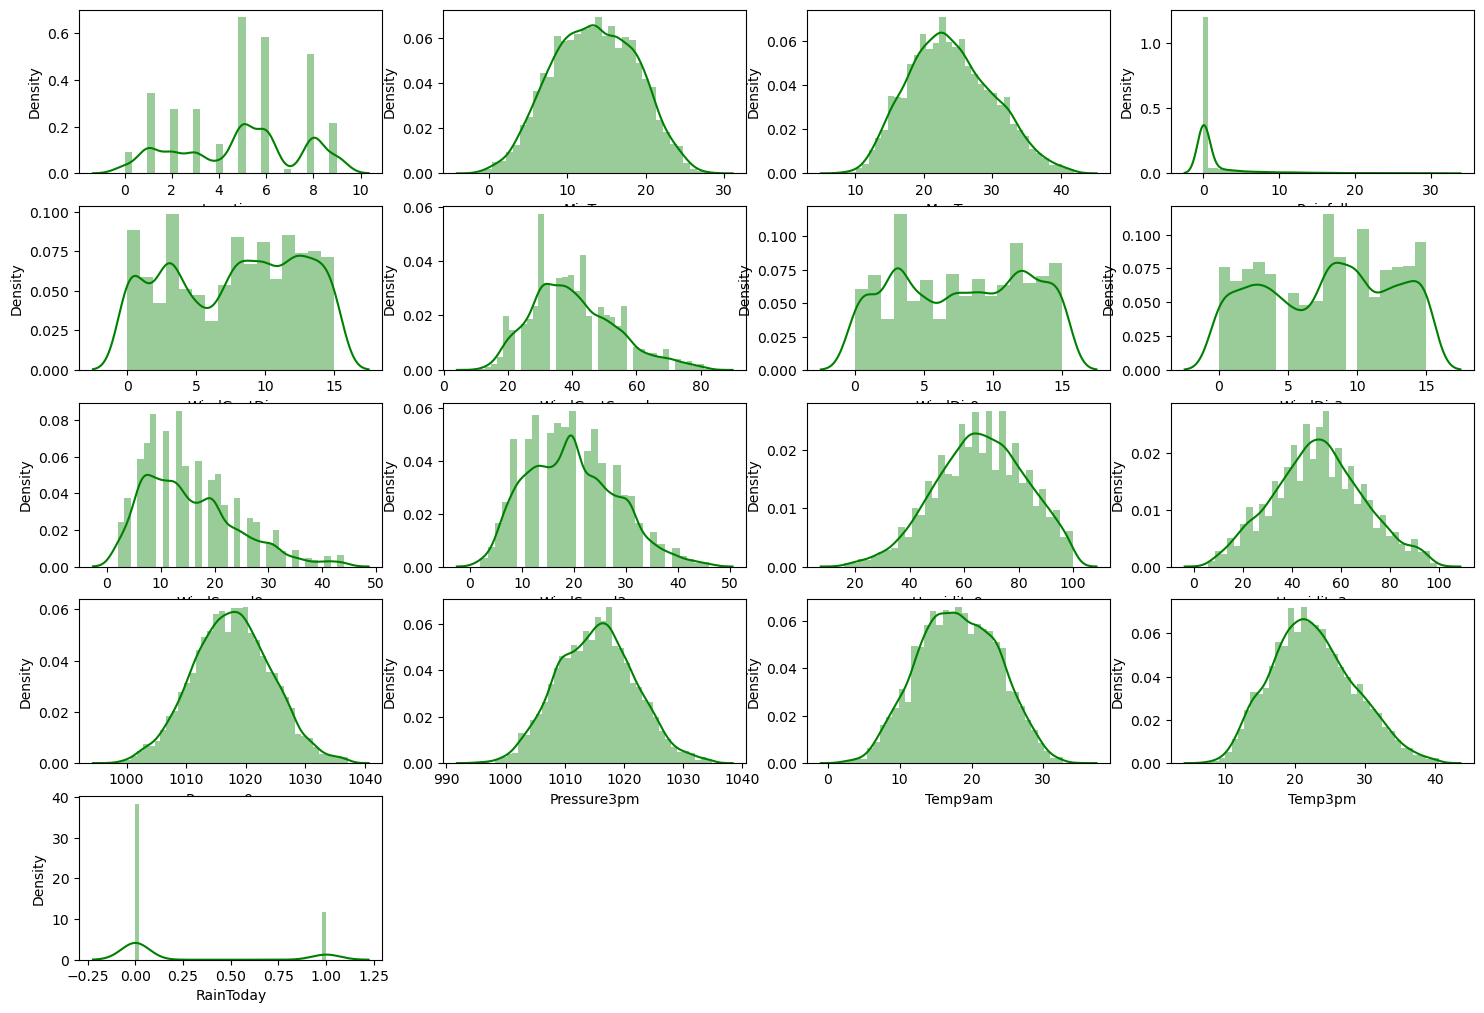

In [25]:
#checking skewing of the dataset distribution 
plt.figure(figsize=(18,20))
for i in enumerate(rain_df.select_dtypes(exclude=['object']).columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(rain_df[i[1]],color='g')

In [26]:
rain_df.skew()

Date             0.813836
Location        -0.168540
MinTemp         -0.028211
MaxTemp          0.278788
Rainfall         3.375234
WindGustDir     -0.138348
WindGustSpeed    0.566864
WindDir9am      -0.043618
WindDir3pm      -0.092681
WindSpeed9am     0.801847
WindSpeed3pm     0.367493
Humidity9am     -0.187556
Humidity3pm      0.095645
Pressure9am      0.055674
Pressure3pm      0.084175
Temp9am         -0.005101
Temp3pm          0.296485
RainToday        1.261397
dtype: float64

Model Building

# 1. Classification model

In [27]:
# Define the feature set and target variable
x = rain_df.drop(columns=['Date', 'RainTomorrow'])
y = rain_df['RainTomorrow']

In [28]:
# Feature scaling using standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,-1.527666,-0.010345,-0.183010,-0.271404,1.101642,0.270899,1.121855,1.335324,0.524079,0.509774,0.296824,-1.576950,-1.525825,-1.264311,-0.219873,-0.132098,-0.551652
1,-1.527666,-1.141559,0.176716,-0.399265,1.311552,0.270899,-0.364679,1.550019,-1.300726,0.275323,-1.351043,-1.412991,-1.084958,-1.156768,-0.165762,0.287940,-0.551652
2,-1.527666,-0.104613,0.274824,-0.399265,1.521463,0.421747,1.121855,1.550019,0.410028,0.744225,-1.717236,-1.139726,-1.541027,-1.018498,0.519641,0.103124,-0.551652
3,-1.527666,-0.802195,0.650901,-0.399265,-0.787554,-1.237577,0.272407,-1.670402,-0.502374,-1.248610,-1.290011,-1.904869,-0.020798,-0.388600,-0.003430,0.657574,-0.551652
4,-1.527666,0.762652,1.354003,-0.186163,1.101642,0.044628,-1.426489,-0.167539,-0.958575,0.040872,0.968177,-0.975767,-1.054554,-1.433308,-0.057540,1.195223,-0.551652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6064,0.826578,-1.876848,-0.362873,-0.399265,-1.627196,-0.709610,-1.214127,-1.670402,-0.046173,-0.779707,-0.435561,-1.303685,1.058564,0.901922,-1.572641,-0.283312,-0.551652
6065,0.826578,-2.008823,-0.101254,-0.399265,-1.627196,-0.709610,0.272407,-1.455707,-0.274273,-1.014158,-0.923818,-1.467644,1.043362,0.763652,-1.446382,-0.031289,-0.551652
6066,0.826578,-1.857994,0.209419,-0.399265,-0.367733,-1.388424,0.272407,-1.026318,-0.274273,-1.248610,-0.618658,-1.631603,0.876137,0.579291,-1.302087,0.321543,-0.551652
6067,0.826578,-1.518630,0.471038,-0.399265,-0.997464,-0.257067,0.272407,1.335324,-0.730474,-1.248610,-0.801754,-1.467644,0.496080,0.225934,-1.013496,0.590368,-0.551652


Dataset Splitting and Training:

In [29]:
# Spliting the data into Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Training and Evaluation:

1. Stochastic Gradient Descent (SGD):

In [30]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)

sgd.score(x_train, y_train)

acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)

acc_sgd

81.89

2. Random Forest:

In [31]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_pred = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

100.0

 3. Logistic Regression:

In [32]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

84.55

4. K Nearest Neighbor:

In [33]:
knn =KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train) 
Y_pred = knn.predict(x_test) 
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

93.57

5. Gaussian Naive Bayes:

In [34]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)
Y_pred =gaussian.predict(x_test) 
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

80.14

6. Perceptron: 

In [35]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(x_train, y_train)

Y_pred = perceptron.predict(x_test)

acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

80.33

7. Linear Support Vector Machine:

In [36]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

84.45

8. Decision Tree:

In [37]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
Y_pred = decision_tree.predict(x_test)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

100.0

Which is the best Model?

In [38]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
93.57,KNN
84.55,Logistic Regression
84.45,Support Vector Machines
81.89,Stochastic Gradient Decent
80.33,Perceptron
80.14,Naive Bayes


As we can see, Decision Tree and Random_forest have the best Score ranked on the table, indicating the best model. However using the cross validation to see which is the best model.

In [39]:
#cross validation for Decision Tree
from sklearn.model_selection import cross_val_score
decision_tree = DecisionTreeClassifier()
scores = cross_val_score(decision_tree, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.84979424 0.8436214  0.8600823  0.87654321 0.8744856  0.82061856
 0.86185567 0.87628866 0.85154639 0.85360825]
Mean: 0.8568444274744389
Standard Deviation: 0.01639614847305167


In [40]:
from sklearn.model_selection import cross_val_score
random_forest = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(random_forest, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.90534979 0.91358025 0.90329218 0.89917695 0.91563786 0.88247423
 0.91134021 0.91134021 0.88659794 0.90721649]
Mean: 0.9036006109201986
Standard Deviation: 0.010656004321127862


The Mean Score for Random forest Classifier Model has Mean Score of 90% while that of the Decision Tree is 85%.Hence the Random forest give more accurate prediction.

In [41]:
# Initialize the model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(x_train, y_train)

# Predict on the validation set
y_pred = random_forest.predict(x_test)
y_pred_proba = random_forest.predict_proba(x_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

          No       0.90      0.97      0.94       925
         Yes       0.89      0.67      0.76       289

    accuracy                           0.90      1214
   macro avg       0.90      0.82      0.85      1214
weighted avg       0.90      0.90      0.90      1214

Accuracy: 0.9011532125205931


This has an 90% accuracy prediction

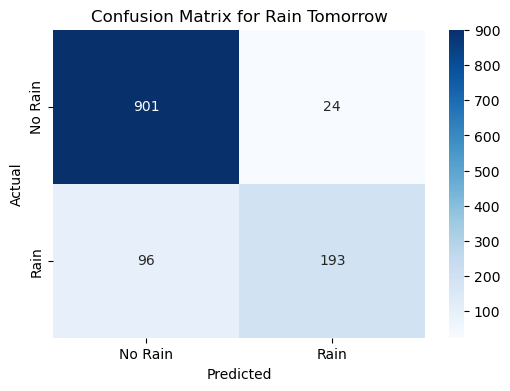

In [42]:
# Plot confusion matrix
conf_matrix_class = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_class, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Rain Tomorrow')
plt.show()

# 2. Regression model

In [43]:
# Defining input features and target variable for Classification
x1 = rain_df.drop(columns=['Date', 'RainTomorrow', 'Rainfall'])
y1= rain_df['Rainfall']

In [44]:
# Spliting the data into Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

Model Training and Evaluation:

In [45]:
#Import training libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.svm import  SVR

from sklearn.preprocessing import OrdinalEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

1. Random Forest:

In [46]:
#Model Training
random_forest = RandomForestRegressor()
random_forest.fit(x_train_1, y_train_1)
pred_random_forest = random_forest.predict(x_test_1)
pred_train = random_forest.predict(x_train_1)


R2_Score_rf = r2_score(y_test_1, pred_random_forest)*100
R2_Score_training_rf = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_rf = mean_absolute_error(y_test_1, pred_random_forest)
Mean_Squared_error_rf = mean_squared_error(y_test_1, pred_random_forest)
Root_Mean_Squared_error_rf= np.sqrt(mean_squared_error(y_test_1, pred_random_forest))

print(random_forest)
print("R2_Score_rf: ", R2_Score_rf)
print("R2_Score on training Data: ", R2_Score_training_rf)
print("Mean Absolute error: ", Mean_Absolute_error_rf)
print("Mean Squared error: ", Mean_Squared_error_rf)
print("Root Mean Squared error: ", Root_Mean_Squared_error_rf)

RandomForestRegressor()
R2_Score_rf:  66.3038555827351
R2_Score on training Data:  95.71529771129431
Mean Absolute error:  0.9551457990115322
Mean Squared error:  6.405582885502471
Root Mean Squared error:  2.5309253022368066


2. K Nearest Neighbor:

In [47]:
knn =KNeighborsRegressor(n_neighbors = 3)
knn.fit(x_train_1, y_train_1)
pred_knn = knn.predict(x_test_1)
pred_train = knn.predict(x_train_1)


R2_Score_kn = r2_score(y_test_1, pred_knn)*100
R2_Score_training_kn = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_kn = mean_absolute_error(y_test_1, pred_knn)
Mean_Squared_error_kn = mean_squared_error(y_test_1, pred_knn)
Root_Mean_Squared_error_kn= np.sqrt(mean_squared_error(y_test_1, pred_knn))

print(knn)
print("R2_Score_kn: ", R2_Score_kn)
print("R2_Score on training Data: ", R2_Score_training_kn)
print("Mean Absolute error: ", Mean_Absolute_error_kn)
print("Mean Squared error: ", Mean_Squared_error_kn)
print("Root Mean Squared error: ", Root_Mean_Squared_error_kn)

KNeighborsRegressor(n_neighbors=3)
R2_Score_kn:  15.117836437621413
R2_Score on training Data:  64.3700774088677
Mean Absolute error:  1.8791048874244918
Mean Squared error:  16.135962840929892
Root Mean Squared error:  4.016959402449805


3. Decision Tree:

In [48]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train_1, y_train_1)
pred_decision_tree = decision_tree.predict(x_test_1)
pred_train = decision_tree.predict(x_train_1)

R2_Score_dt = r2_score(y_test_1, pred_decision_tree)*100
R2_Score_training_dt = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_dt = mean_absolute_error(y_test_1, pred_decision_tree)
Mean_Squared_error_dt = mean_squared_error(y_test_1, pred_decision_tree)
Root_Mean_Squared_error_dt =  np.sqrt(mean_squared_error(y_test_1, pred_decision_tree))

print(decision_tree)
print("R2_Score_dt: ", R2_Score_dt)
print("R2_Score on training Data: ", R2_Score_training_dt)
print("Mean Absolute error: ", Mean_Absolute_error_dt)
print("Mean Squared error: ", Mean_Squared_error_dt)
print("Root Mean Squared error: ", Root_Mean_Squared_error_dt)

DecisionTreeRegressor()
R2_Score_dt:  37.7372634459186
R2_Score on training Data:  100.0
Mean Absolute error:  1.0510708401976936
Mean Squared error:  11.836046128500824
Root Mean Squared error:  3.440355523561602


4. Logistic Regression:

In [49]:
logreg = LinearRegression()
logreg.fit(x_train_1, y_train_1)
pred_logreg = logreg.predict(x_test_1)
pred_train = logreg.predict(x_train_1)

R2_Score_lo = r2_score(y_test_1, pred_logreg)*100
R2_Score_training_lo = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_lo = mean_absolute_error(y_test_1, pred_logreg)
Mean_Squared_error_lo = mean_squared_error(y_test_1, pred_logreg)
Root_Mean_Squared_error_lo =  np.sqrt(mean_squared_error(y_test_1, pred_logreg))

print(logreg)
print("R2_Score_lo: ", R2_Score_lo)
print("R2_Score on training Data: ",R2_Score_training_lo)
print("Mean Absolute error: ", Mean_Absolute_error_lo)
print("Mean Squared error: ", Mean_Squared_error_lo)
print("Root Mean Squared error: ", Root_Mean_Squared_error_lo)

LinearRegression()
R2_Score_lo:  50.06429077670877
R2_Score on training Data:  50.851215877149144
Mean Absolute error:  1.4970828825408815
Mean Squared error:  9.49269804922404
Root Mean Squared error:  3.0810222409492667


5. Gradient Boosting 

In [50]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train_1, y_train_1)
pred_GBR = GBR.predict(x_test_1)
pred_train = GBR.predict(x_train_1)

R2_Score_gbr = r2_score(y_test_1, pred_GBR)*100
R2_Score_training_gbr = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_gbr = mean_absolute_error(y_test_1, pred_GBR)
Mean_Squared_error_gbr = mean_squared_error(y_test_1, pred_GBR)
Root_Mean_Squared_error_gbr =  np.sqrt(mean_squared_error(y_test_1, pred_GBR))

print(GBR)
print("R2_Score_gbr: ", R2_Score_gbr)
print("R2_Score on training Data: ", R2_Score_training_gbr)
print("Mean Absolute error: ", Mean_Absolute_error_gbr)
print("Mean Squared error: ", Mean_Squared_error_gbr)
print("Root Mean Squared error: ", Root_Mean_Squared_error_gbr)

GradientBoostingRegressor()
R2_Score_gbr:  61.02433106358226
R2_Score on training Data:  67.99993414537326
Mean Absolute error:  1.1393694638249474
Mean Squared error:  7.409212009496507
Root Mean Squared error:  2.7219867761428427


6. Ridge

In [51]:
rid = Ridge()
rid .fit(x_train_1, y_train_1)
pred_rid  = rid .predict(x_test_1)
pred_train = rid .predict(x_train_1)

R2_Score_rid = r2_score(y_test_1, pred_rid)*100
R2_Score_training_rid = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_rid = mean_absolute_error(y_test_1, pred_rid)
Mean_Squared_error_rid =  mean_squared_error(y_test_1, pred_rid)
Root_Mean_Squared_error_rid = np.sqrt(mean_squared_error(y_test_1, pred_rid))

print(rid )
print("R2_Score_rid: ", R2_Score_rid)
print("R2_Score on training Data: ", R2_Score_training_rid)
print("Mean Absolute error: ", Mean_Absolute_error_rid)
print("Mean Squared error: ", Mean_Squared_error_rid)
print("Root Mean Squared error: ", Root_Mean_Squared_error_rid)

Ridge()
R2_Score_rid:  50.068699968229645
R2_Score on training Data:  50.85114128857895
Mean Absolute error:  1.4974973741717488
Mean Squared error:  9.491859869003918
Root Mean Squared error:  3.0808862148745315


7. SVR

In [52]:
svr = SVR()
svr.fit(x_train_1, y_train_1)
pred_svr = svr.predict(x_test_1)
pred_train = svr.predict(x_train_1)

R2_Score_svr = r2_score(y_test_1, pred_svr)*100
R2_Score_training_svr = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_svr = mean_absolute_error(y_test_1, pred_svr)
Mean_Squared_error_svr =  mean_squared_error(y_test_1, pred_svr)
Root_Mean_Squared_error_svr = np.sqrt(mean_squared_error(y_test_1, pred_svr))

print(svr)
print("R2_Score_svr: ", R2_Score_svr)
print("R2_Score on training Data: ", R2_Score_training_svr)
print("Mean Absolute error: ", Mean_Absolute_error_svr)
print("Mean Squared error: ", Mean_Squared_error_svr)
print("Root Mean Squared error: ", Root_Mean_Squared_error_svr)

SVR()
R2_Score_svr:  -11.225097392709449
R2_Score on training Data:  -12.1169818548728
Mean Absolute error:  1.7215237285490304
Mean Squared error:  21.143712214506092
Root Mean Squared error:  4.598229247711133


In [53]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'KNN', 'Decision Tree', 
              'Linear Regression', 'Gradient Boosting',
              'Ridge', 'SVR'],
    'Score': [R2_Score_rf, R2_Score_kn, R2_Score_dt, 
              R2_Score_lo, R2_Score_gbr,
             R2_Score_rid, R2_Score_svr]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
66.303856,Random Forest
61.024331,Gradient Boosting
50.068700,Ridge
50.064291,Linear Regression
37.737263,Decision Tree
15.117836,KNN
-11.225097,SVR


As we can see, Random Forest is ranked the first on the table with the highest R2 Score. Checking how Random Forest performs.

In [54]:
#Saving the best model
import joblib
joblib.dump(random_forest, "Rainfall.pkl")

['Rainfall.pkl']

In [55]:
# PREDICTION OF TEST RESULT
y_pred = random_forest.predict(x_test_1)
print('Predictions:\n', y_pred)

Predictions:
 [0.63  6.292 0.18  ... 0.062 0.052 0.016]


In [56]:
# COMPARING TEST DATA AND PREDICTED DATA
comparison_df = pd.DataFrame({"Actual":y_test_1,"Predicted":y_pred})
print('Actual test data vs predicted: \n', comparison_df)

Actual test data vs predicted: 
       Actual  Predicted
4671     1.0      0.630
4625     2.6      6.292
7717     0.4      0.180
6704     0.0      0.006
5084     0.0      0.040
...      ...        ...
6764     0.0      0.048
4790     0.0      0.062
5980     0.2      0.062
3523     0.0      0.052
1118     0.0      0.016

[1214 rows x 2 columns]


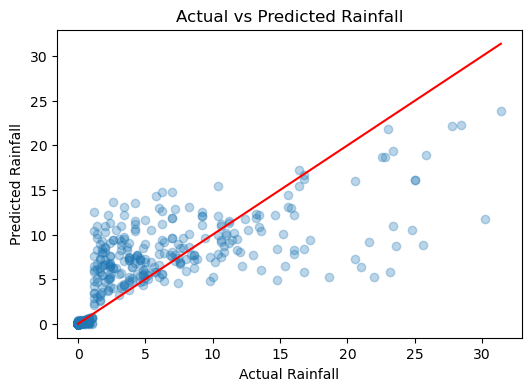

In [57]:
# Plot predicted vs actual
plt.figure(figsize=(6, 4))
plt.scatter(y_test_1, y_pred, alpha=0.3)
plt.plot([min(y_test_1), max(y_test_1)], [min(y_test_1), max(y_test_1)], color='red')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.show()